## Load heart disease dataset<a id="2"></a>


In [1]:
### Import required libraries

import numpy as np
import pandas as pd
import gc

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from IPython.display import display # Allows the use of display() for DataFrames

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("heart.csv") # load dataset
data_model  = data.copy(deep=True)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.shape

(303, 14)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<Axes: xlabel='target'>

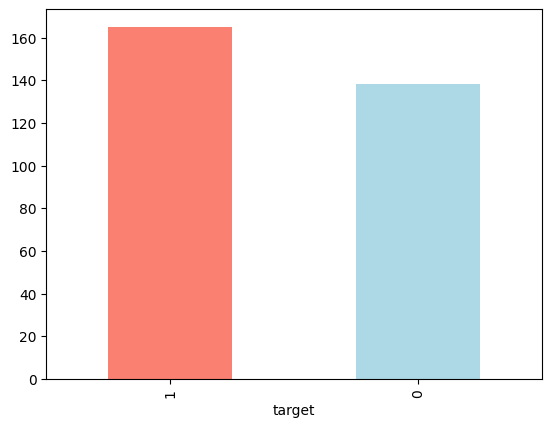

In [6]:
# check the distribution of target labels
data.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [7]:
# check if there is any null values
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


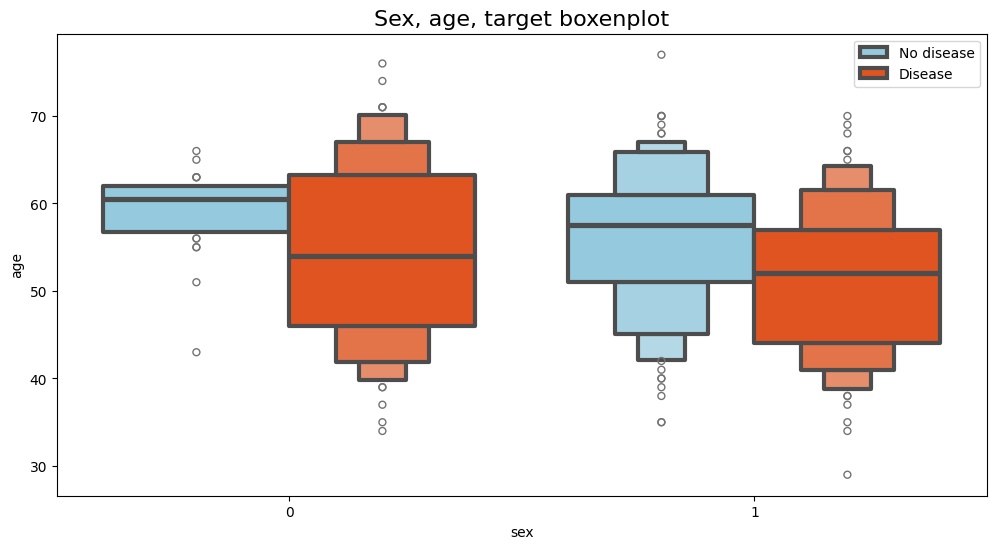

In [8]:
plt.figure(figsize=(12,6))
palette=['skyblue','orangered']
s1=sns.boxenplot(x=data.sex, y=data.age, hue=data.target, palette=palette, linewidth=3)
handles = s1.get_legend_handles_labels()[0]
s1.legend(handles, ['No disease', 'Disease'])
s1.set_title("Sex, age, target boxenplot",fontsize=16)
plt.show()
# On average, men start having heart problems at an earlier age than women.

## Data cleaning<a id="3"></a>


In [9]:
# Definition of the IQR method for detecting outlier values
def iqr(df, column):
  Q1 = np.percentile(df[column], 25)
  Q3 = np.percentile(df[column], 75)
  IQR = Q3 - Q1
  outlier_step = 1.5 * IQR
  outliers_index = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
  return outliers_index

In [10]:
# outliers in trestbps
outliers_index = iqr(data,'trestbps')
data.drop(outliers_index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [11]:
# outliers in cholesterol
outliers_index = iqr(data,'chol')
data.drop(outliers_index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [12]:
# outliers in thalach
outliers_index = iqr(data,'thalach')
data.drop(outliers_index, inplace=True)
data.reset_index(drop=True, inplace=True)

In [13]:
# outliers in oldpeak
outliers_index = iqr(data,'oldpeak')
data.drop(outliers_index, inplace=True)
data.reset_index(drop=True, inplace=True)

## Data preparation<a id="4"></a>


In [14]:
#Dropping columns used only to plots.
#data.drop(['bin_chol','bin_thalach','bin_trestbps'],axis=1,inplace=True)

In [15]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
X = data.drop('target', axis=1)
y = data.target

In [17]:
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler()
dataset_scaled = scalar.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(dataset_scaled, y, test_size=0.2, random_state=42)

In [19]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
dataset_scaled[0:6,:]

array([[0.70833333, 1.        , 1.        , 0.67105263, 0.45726496,
        1.        , 0.        , 0.54385965, 0.        , 0.575     ,
        0.        , 0.        , 0.33333333],
       [0.16666667, 1.        , 0.66666667, 0.47368421, 0.52991453,
        0.        , 0.5       , 0.86842105, 0.        , 0.875     ,
        0.        , 0.        , 0.66666667],
       [0.25      , 0.        , 0.33333333, 0.47368421, 0.33333333,
        0.        , 0.        , 0.73684211, 0.        , 0.35      ,
        1.        , 0.        , 0.66666667],
       [0.5625    , 1.        , 0.33333333, 0.34210526, 0.47008547,
        0.        , 0.5       , 0.78947368, 0.        , 0.2       ,
        1.        , 0.        , 0.66666667],
       [0.58333333, 0.        , 0.        , 0.34210526, 0.97435897,
        0.        , 0.5       , 0.65789474, 1.        , 0.15      ,
        1.        , 0.        , 0.66666667],
       [0.58333333, 1.        , 0.        , 0.60526316, 0.28205128,
        0.        , 0.5    

## Data Modelling<a id="5"></a>


### Decision Tree Classifier
Decision tree model is optimisEd with GridSearchCV for hyperparameter tunning.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier()

In [22]:
params = {"criterion":("gini", "entropy"),
          "splitter":("best", "random"),
          "max_depth":(list(range(1, 20))),
          "min_samples_split":[2, 3, 4],
          "min_samples_leaf":list(range(1, 20))}

tree_param = GridSearchCV(tree_clf, params, cv=5, scoring = 'accuracy')

tree_param.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='accuracy')

In [23]:
best_params = tree_param.best_params_
#Best params selected by GridSearchCV
best_params

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [24]:
tree_param = DecisionTreeClassifier(**best_params)
tree_param.fit(X_train, y_train)
predict = tree_param.predict(X_test)

In [25]:
tree_param.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       splitter='random')

In [26]:
pred = tree_param.predict(X_test)

In [27]:
tree_acc_train = tree_param.score(X_train, y_train)*100
tree_acc_test = tree_param.score(X_test, y_test)*100

print("Decision Tree Classifier: Train Accuracy {:.2f}%".format(tree_acc_train))
print("Decision Tree Classifier: Test Accuracy {:.2f}%".format(tree_acc_test))

Decision Tree Classifier: Train Accuracy 88.99%
Decision Tree Classifier: Test Accuracy 84.21%


<Axes: >

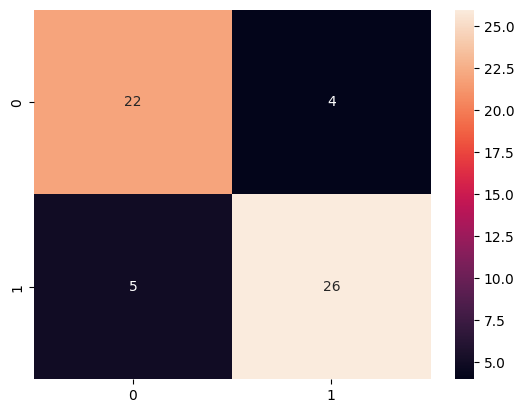

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, pred), annot=True)

#### ROC Curve for Decision Tree

In [29]:
from sklearn.metrics import roc_auc_score,roc_curve

y_probabilities = tree_param.predict_proba(X_test)[:,1]

In [30]:
false_positive_rate_tree, true_positive_rate_tree, threshold_tree = roc_curve(y_test,y_probabilities)

### XGBoost Classifier
XGBoost classifier optimised with GridSearchCV for hyperparameter tunning.

In [31]:
!pip install xgboost
from xgboost.sklearn import XGBClassifier
import xgboost as xgb

In [32]:
n_estimators = [6,7,8]
max_depth = [3,4,5]
min_child_weight = range(1,3,1)
booster = ['gbtree']
base_score = [0.5,0.6]
learning_rate = [0.1,0.2,0.25]
objective = ['binary:logistic']
seed = [27]
gamma= [0,7,0.8,0.9]
colsample_bytree=[0.7,0.8,0.9]
subsample=[0.6,0.7,0.8]
reg_alpha = [1e-5,0.01,0.015,0.02,0.03]

xgb_params = {'n_estimators': n_estimators, 'max_depth': max_depth,
    'learning_rate' : learning_rate, 'min_child_weight' : min_child_weight,
    'booster' : booster, 'base_score' : base_score,'objective': objective,'seed':seed,
    'reg_alpha':reg_alpha}

In [ ]:
xgb_cv = GridSearchCV(xgb.XGBClassifier(), xgb_params, cv=5, scoring = 'accuracy',n_jobs =-1, verbose=0)
xgb_cv.fit(X_train, y_train)

In [ ]:
best_params = xgb_cv.best_params_
#Best params selected by GridSearchCV
best_params

In [ ]:
xgb_model = xgb.XGBClassifier(**best_params, silent=1)
xgb_model.fit(X_train, y_train)

In [ ]:
print("Train Accuracy {:.2f}%".format(xgb_model.score(X_train, y_train)*100))
print("Test Accuracy {:.2f}%".format(xgb_model.score(X_test, y_test)*100))

#### Fine-tune XGBoost model hyper-parameters


In [ ]:
# set parameter ranges
param_test1 = {
 'max_depth':range(3,6,1),
 'min_child_weight':range(2,5,1)
}
# Create a new GridSearchCV instance
# Notice that the name of gsearch1 is gsearch"number one"
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.6,booster='gbtree',learning_rate =0.25, n_estimators=8, max_depth=3,
 min_child_weight=5,objective= 'binary:logistic',reg_alpha=0.01, seed=27),
 param_grid = param_test1, scoring='accuracy',n_jobs=-1,verbose=0, cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

In [ ]:
xgb_model1 = xgb.XGBClassifier(base_score=0.6,booster='gbtree',learning_rate =0.25, n_estimators=8, max_depth=5,
 min_child_weight=2,objective= 'binary:logistic',reg_alpha=0.01, seed=27)
xgb_model1.fit(X_train, y_train)

In [ ]:
xgb_acc_train = xgb_model1.score(X_train, y_train)*100
xgb_acc_test = xgb_model1.score(X_test, y_test)*100

print("Train Accuracy {:.2f}%".format(xgb_acc_train))
print("Test Accuracy {:.2f}%".format(xgb_acc_test))

#### Happy to see that our accuracy rate has improved from 80.70% to 87.72%.

In [ ]:
predict = xgb_model.predict(X_test)

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predict), annot=True)

In [ ]:
### ROC Curve for XGB Classifier

y_probabilities = xgb_model1.predict_proba(X_test)[:,1]

false_positive_rate_xgb, true_positive_rate_xgb, threshold_xgb = roc_curve(y_test,y_probabilities)

xgb_AUC = roc_auc_score(y_test,y_probabilities)

#Plotting ROC Curve
plt.figure(figsize=(6,4))
plt.title('ROC curve for XGB Classifier')
plt.plot(false_positive_rate_xgb, true_positive_rate_xgb, linewidth=5, color='red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')

plt.text(0.2,0.6,'AUC: {:.2f}'.format(xgb_AUC),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Summarises feature importance scores and reports the coefficient value for each feature


In [ ]:
importance = xgb_model.feature_importances_*100
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
from matplotlib import pyplot

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()